# Лабораторная работа №7. Классификация

Выполнил студент группы 12002209 Телятников Максим Евгеньевич

Выполните следующие задания:

1. Откройте в файл в Google Colab (используйте собственный форк репозитория).
2. Решите задачи.
3. Сохраните результат в виде файла rep.ipynb в ваш репозиторий github в директорию ./les07
4. Создайте pull request в репозиторий https://github.com/chebotarevsa/dap-2024. Название pull request должно иметь формат "<Номер лабораторной работы>  <Номер группы> <ФИО>"
5. Сдайте работу в системе "Пегас", в отчет укажите ссылку на pull request

Используя набор данных titanic.csv постройте модель предсказывающую выжил или погиб пассажир.
1.	PassengerId – Идентификатор пассажира (уникальный номер для каждого пассажира).
2.	Survived – Выжил (0 – не выжил, 1 – выжил).
3.	Pclass – Класс пассажира (1 – первый класс, 2 – второй класс, 3 – третий класс).
4.	Name – Имя (полное имя пассажира).
5.	Sex – Пол (male – мужчина, female – женщина).
6.	Age – Возраст (числовое значение, может быть дробным).
7.	SibSp – Количество родственников на борту (братьев, сестер или супругов).
8.	Parch – Количество родителей или детей на борту.
9.	Ticket – Номер билета.
10.	Fare – Стоимость билета (в фунтах стерлингов).
11.	Cabin – Номер каюты (может быть пропущен, если данные отсутствуют).
12.	Embarked – Порт посадки (C – Cherbourg, Q – Queenstown, S – Southampton).

In [13]:
import sys
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

print(f"Python version: {sys.version}")
print(f"Numpy version: {np.version.version}")
print(f"Pandas version: {pd.__version__}")
print(f"Matplotlib version: {mpl.__version__}")

Python version: 3.11.11 (main, Dec  4 2024, 08:55:07) [GCC 11.4.0]
Numpy version: 2.0.2
Pandas version: 2.2.2
Matplotlib version: 3.10.0


## Извлечение данных

1. Создайте DataFarame из файла titanic.csv, в качестве индекса используйте столбец "PassengerId".

In [14]:
df = pd.read_csv('titanic.csv', index_col='PassengerId')

2. Выведете первые 7 строк набора.

In [15]:
output_file = 'titanic_first_7_rows.xlsx'
df.head(7).to_excel(output_file, sheet_name='Первые 7 строк')

print(f"\nПервые 7 строк сохранены в файл: {output_file}")


Первые 7 строк сохранены в файл: titanic_first_7_rows.xlsx


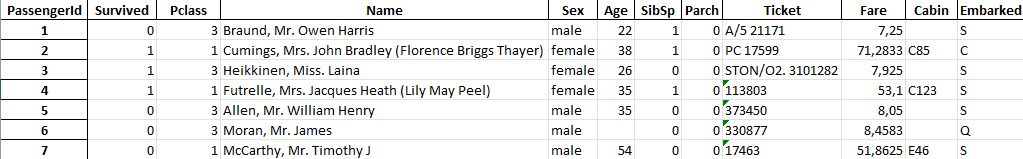

### Подготовка данных

3. Выведете информацию о типах данных в наборе. Имеются ли в наборе не числовые признаки? Имеются ли в наборе данные имеющие значение null?
    

In [16]:
print(df.info())

non_numeric_columns = df.select_dtypes(exclude=['number']).columns
print("Нечисловые признаки:", non_numeric_columns)

print("Количество пропущенных значений по столбцам:")
print(df.isna().sum())

<class 'pandas.core.frame.DataFrame'>
Index: 891 entries, 1 to 891
Data columns (total 11 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Name      891 non-null    object 
 3   Sex       891 non-null    object 
 4   Age       714 non-null    float64
 5   SibSp     891 non-null    int64  
 6   Parch     891 non-null    int64  
 7   Ticket    891 non-null    object 
 8   Fare      891 non-null    float64
 9   Cabin     204 non-null    object 
 10  Embarked  889 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 83.5+ KB
None
Нечисловые признаки: Index(['Name', 'Sex', 'Ticket', 'Cabin', 'Embarked'], dtype='object')
Количество пропущенных значений по столбцам:
Survived      0
Pclass        0
Name          0
Sex           0
Age         177
SibSp         0
Parch         0
Ticket        0
Fare          0
Cabin       687
Embarked      2
dtype: int64


4. Удалите не числовые признаки, которые по вашему мнению, не могут влиять на заначение выжил или погиб пассажир.

In [17]:
df.drop(['Name', 'Ticket', 'Cabin', 'Embarked'], axis=1, inplace=True)

print(df.head())

             Survived  Pclass     Sex   Age  SibSp  Parch     Fare
PassengerId                                                       
1                   0       3    male  22.0      1      0   7.2500
2                   1       1  female  38.0      1      0  71.2833
3                   1       3  female  26.0      0      0   7.9250
4                   1       1  female  35.0      1      0  53.1000
5                   0       3    male  35.0      0      0   8.0500


5. Вместо признака "Sex" (я надеюсь вы его не удалили 😂) Создайте два новых признака male и female которые содержат значения 0 или 1.

In [18]:
df['male'] = (df['Sex'] == 'male').astype(int)
df['female'] = (df['Sex'] == 'female').astype(int)
df.drop('Sex', axis=1, inplace=True)

print(df.head())

             Survived  Pclass   Age  SibSp  Parch     Fare  male  female
PassengerId                                                             
1                   0       3  22.0      1      0   7.2500     1       0
2                   1       1  38.0      1      0  71.2833     0       1
3                   1       3  26.0      0      0   7.9250     0       1
4                   1       1  35.0      1      0  53.1000     0       1
5                   0       3  35.0      0      0   8.0500     1       0


6. Удалите строки, которые содержать хотя бы одно null значение.

In [20]:
df.dropna(axis=0, inplace=True)

print("Информация о DataFrame после удаления строк с null:")
print(df.info())

Информация о DataFrame после удаления строк с null:
<class 'pandas.core.frame.DataFrame'>
Index: 714 entries, 1 to 891
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  714 non-null    int64  
 1   Pclass    714 non-null    int64  
 2   Age       714 non-null    float64
 3   SibSp     714 non-null    int64  
 4   Parch     714 non-null    int64  
 5   Fare      714 non-null    float64
 6   male      714 non-null    int64  
 7   female    714 non-null    int64  
dtypes: float64(2), int64(6)
memory usage: 50.2 KB
None


## Исследование данных

4. Нормализуйте значения признака "Fare".

In [24]:
min_fare = df['Fare'].min()
max_fare = df['Fare'].max()

df['Fare_normalized'] = (df['Fare'] - min_fare) / (max_fare - min_fare)

print("Минимальное значение Fare_normalized:", df['Fare_normalized'].min())
print("Максимальное значение Fare_normalized:", df['Fare_normalized'].max())

print("Первые 5 строк DataFrame с нормализованным признаком 'Fare':")
print(df.head())

Минимальное значение Fare_normalized: 0.0
Максимальное значение Fare_normalized: 1.0
Первые 5 строк DataFrame с нормализованным признаком 'Fare':
             Survived  Pclass   Age  SibSp  Parch     Fare  male  female  \
PassengerId                                                                
1                   0       3  22.0      1      0   7.2500     1       0   
2                   1       1  38.0      1      0  71.2833     0       1   
3                   1       3  26.0      0      0   7.9250     0       1   
4                   1       1  35.0      1      0  53.1000     0       1   
5                   0       3  35.0      0      0   8.0500     1       0   

             Fare_normalized  
PassengerId                   
1                   0.014151  
2                   0.139136  
3                   0.015469  
4                   0.103644  
5                   0.015713  


5. Найдите разницу между средними значениями признака "Fare" для погибших и выживших пассажиров.

In [28]:
mean_fare_survived = df[df['Survived'] == 1]['Fare'].mean()
mean_fare_not_survived = df[df['Survived'] == 0]['Fare'].mean()

fare_difference = mean_fare_survived - mean_fare_not_survived

print("Среднее значение Fare для выживших:", mean_fare_survived)
print("Среднее значение Fare для погибших:", mean_fare_not_survived)
print("Разница между средними значениями:", fare_difference)

Среднее значение Fare для выживших: 51.843205172413796
Среднее значение Fare для погибших: 22.96545636792453
Разница между средними значениями: 28.877748804489265


6. Простройте на одной оси координат гистограмы значений признака "Fare" для погибших и выживших пассажиров.

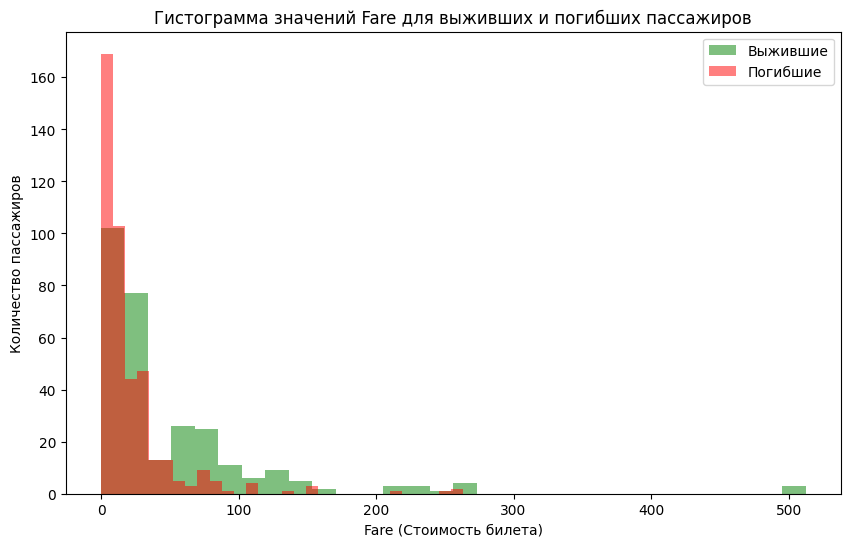

In [29]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))

plt.hist(df[df['Survived'] == 1]['Fare'], bins=30, alpha=0.5, label='Выжившие', color='green')
plt.hist(df[df['Survived'] == 0]['Fare'], bins=30, alpha=0.5, label='Погибшие', color='red')

plt.xlabel('Fare (Стоимость билета)')
plt.ylabel('Количество пассажиров')
plt.title('Гистограмма значений Fare для выживших и погибших пассажиров')

plt.legend()
plt.show()

7. Сформируйте набор признаков (X). Сформируйте вектор целевых значений (y).

In [30]:
X = df.drop('Survived', axis=1)
y = df['Survived']

print("Набор признаков (X):")
print(X.head())

print("\nВектор целевых значений (y):")
print(y.head())

Набор признаков (X):
             Pclass   Age  SibSp  Parch     Fare  male  female  \
PassengerId                                                      
1                 3  22.0      1      0   7.2500     1       0   
2                 1  38.0      1      0  71.2833     0       1   
3                 3  26.0      0      0   7.9250     0       1   
4                 1  35.0      1      0  53.1000     0       1   
5                 3  35.0      0      0   8.0500     1       0   

             Fare_normalized  
PassengerId                   
1                   0.014151  
2                   0.139136  
3                   0.015469  
4                   0.103644  
5                   0.015713  

Вектор целевых значений (y):
PassengerId
1    0
2    1
3    1
4    1
5    0
Name: Survived, dtype: int64


## Предсказательная модель

8. Разделите набор данных на два, одни для обучения модели другой для проверки. Тестовый набор должен содержать 25 процентов данных.

In [31]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

print("Размер обучающей выборки (X_train):", X_train.shape)
print("Размер тестовой выборки (X_test):", X_test.shape)
print("Размер обучающей выборки (y_train):", y_train.shape)
print("Размер тестовой выборки (y_test):", y_test.shape)

Размер обучающей выборки (X_train): (535, 8)
Размер тестовой выборки (X_test): (179, 8)
Размер обучающей выборки (y_train): (535,)
Размер тестовой выборки (y_test): (179,)


9. Выполните обучение модели.

In [34]:
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

model = LogisticRegression(random_state=42, solver='liblinear', max_iter=1000)
model.fit(X_train_scaled, y_train)

print("Модель успешно обучена!")

Модель успешно обучена!


## Проверка модели

10. Выведите мартицу ошибок

In [35]:
from sklearn.metrics import confusion_matrix

y_pred = model.predict(X_test_scaled)
conf_matrix = confusion_matrix(y_test, y_pred)

print("Матрица ошибок:")
print(conf_matrix)

Матрица ошибок:
[[91 16]
 [25 47]]


11. Расчитайте accuracy

In [36]:
from sklearn.metrics import accuracy_score

y_pred = model.predict(X_test_scaled)
accuracy = accuracy_score(y_test, y_pred)

print("Точность модели (accuracy):", accuracy)

Точность модели (accuracy): 0.770949720670391


12. Сделайте вывод о полученном результате

Вывод: Полученное значение accuracy = 0.7709 означает, что модель классифицирует пассажиров (выжили они или нет) правильно в 77% случаев. Это говорит о достаточно хорошей способности модели предсказывать исход для пассажиров на основе имеющихся признаков.

## Вопросы для защиты

#### 1. **Сформулируйте задачу классификации.**
Задача классификации — это задача машинного обучения, в которой необходимо отнести объекты к одному из заранее определенных классов на основе их признаков. Например, классификация писем на "спам" и "не спам" или определение выживших и погибших пассажиров на Титанике.

---

#### 2. **Перечислите типы классификации.**
Основные типы классификации:
- **Бинарная классификация**: Классификация на два класса (например, "спам" или "не спам").
- **Мультиклассовая классификация**: Классификация на три и более классов (например, классификация изображений на "кошки", "собаки", "птицы").
- **Классификация по нескольким меткам**: Каждый объект может принадлежать нескольким классам одновременно (например, классификация текстов по темам: "спорт", "политика", "экономика").
- **Несбалансированная классификация**: Классификация, в которой классы представлены в данных неравномерно (например, 90% объектов принадлежат одному классу, а 10% — другому).

---

#### 3. **В чем особенность несбалансированной классификации?**
Особенность несбалансированной классификации заключается в том, что один класс значительно преобладает над другим. Это может привести к тому, что модель будет предсказывать только доминирующий класс, игнорируя меньшинство. Для решения этой проблемы используются методы, такие как:
- Взвешивание классов.
- Оверсэмплинг (увеличение числа объектов меньшинства).
- Андерсэмплинг (уменьшение числа объектов большинства).

---

#### 4. **В чем особенность мультиклассовой классификации?**
Особенность мультиклассовой классификации заключается в том, что модель должна различать три и более классов. Это требует более сложных алгоритмов и подходов, таких как:
- Использование стратегий "Один против всех" (One-vs-Rest) или "Один против одного" (One-vs-One).
- Применение алгоритмов, которые изначально поддерживают мультиклассовую классификацию (например, Random Forest, Gradient Boosting).

---

#### 5. **В чем особенность бинарной классификации?**
Особенность бинарной классификации заключается в том, что модель должна различать только два класса. Это упрощает задачу, так как:
- Модель предсказывает вероятность принадлежности к одному из классов.
- Метрики оценки (например, accuracy, precision, recall) интерпретируются проще, чем в мультиклассовой классификации.

---

#### 6. **В чем особенность классификации по нескольким меткам?**
Особенность классификации по нескольким меткам заключается в том, что каждый объект может принадлежать нескольким классам одновременно. Например, текст может быть одновременно о "спорте" и "политике". Для решения таких задач используются:
- Алгоритмы, которые поддерживают многометочную классификацию (например, MLkNN).
- Преобразование задачи в несколько задач бинарной классификации (для каждой метки отдельно).

---

#### 7. **Чем стратегия "Один против всех" отличается от стратегии "Один против одного"?**
- **Один против всех (One-vs-Rest)**:
  - Для каждого класса строится отдельная модель, которая отличает этот класс от всех остальных.
  - Подходит для мультиклассовой классификации.
  - Меньше моделей, но каждая модель обучается на всех данных.

- **Один против одного (One-vs-One)**:
  - Для каждой пары классов строится отдельная модель.
  - Подходит для мультиклассовой классификации.
  - Больше моделей, но каждая модель обучается только на данных двух классов.

---

#### 8. **Что такое матрица ошибок (несоответствий)?**
Матрица ошибок (confusion matrix) — это таблица, которая показывает, сколько правильных и ошибочных предсказаний сделала модель. Она состоит из:
- **TN (True Negative)**: Правильно предсказанные отрицательные классы.
- **FP (False Positive)**: Неправильно предсказанные положительные классы.
- **FN (False Negative)**: Неправильно предсказанные отрицательные классы.
- **TP (True Positive)**: Правильно предсказанные положительные классы.

---

#### 9. **Как рассчитывается Accuracy?**
Accuracy (точность) рассчитывается по формуле:

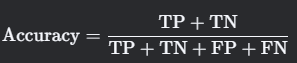

Где:
- **TP** — True Positive.
- **TN** — True Negative.
- **FP** — False Positive.
- **FN** — False Negative.

---

#### 10. **Объясните алгоритм классификации K-ближайших соседей.**
Алгоритм K-ближайших соседей (K-Nearest Neighbors, KNN) — это алгоритм классификации, который предсказывает класс объекта на основе классов его ближайших соседей в пространстве признаков. Основные шаги:
1. Выбор числа соседей \( K \).
2. Вычисление расстояния между объектами (например, евклидово расстояние).
3. Нахождение \( K \) ближайших соседей.
4. Определение класса объекта как наиболее часто встречающегося среди \( K \) соседей.
